In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

dataset = pd.read_csv('/datasets/games.csv')

In [142]:
dataset.info

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [143]:
print(dataset.head(20))

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

In [144]:
dataset.columns = dataset.columns.str.lower()
print(dataset.head(10))
print('__________________________________________________________________________')
dataset.info()

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [145]:
dataset['year_of_release'] = pd.to_numeric(dataset['year_of_release'], errors='coerce').astype('Int64')
#Convierto los numeros de Year of release a enteros, algo más adecuado cuando se habla de años

dataset['user_score'] = pd.to_numeric(dataset['user_score'], errors='coerce')
#Tratandose de una puntuacion, hacerlo en decimales seria más practico

In [146]:
print(dataset.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [151]:
##En esta celda recibo mensajes de advertencia, todo esta bien, solo debe ser ejecutada 3 veces

dataset['user_score'] = dataset['user_score'].replace('tbd', np.nan)
#El TBD puede ser descrito de manera igual que valores nan, asi que lo cambio de esta manera

dataset = dataset.dropna(subset=['name'])
#Si al final necesitamos hacer una evaluacion de ventas o cualquier analisis donde el titulo del juego importa, cambiar el nombre de aquellos dos podria alterar las mediciones

dataset['year_of_release'] = dataset['year_of_release'].fillna(0)
#Cambio el año de lanzamiento ausente a 0 de manera que no se pierde la informacion de aquellos juegos, en caso de necesitarse hacer un promedio el numero 0 puede ser ignorado

dataset['genre'] = dataset['genre'].fillna('others')
#Cambio los valores nulos por "others" para no perder estos datos, al no ser muchos no afectara de gran manera las mediciones

dataset['critic_score'] = dataset['critic_score'].fillna(0)
#Se perderian muchos datos al borrar estos, por lo que les pongo 0, igualmente en caso de necesitarse un promedio, elm 0 puede ser ignorado sabiendo que es simbolico

dataset['user_score'] = dataset['user_score'].fillna(0)
#Aqui hago lo mismo, en caso de necesitarse no se tomaran en cuenta valores con 0

dataset['rating'] = dataset['rating'].fillna('RP')
#Los juegos sin categoria suelen ser clasificados como"Rating pending" o abreviado, RP

In [152]:
print(dataset.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64


In [153]:
dataset['total_sales'] = (
    dataset['na_sales'] +
    dataset['eu_sales'] +
    dataset['jp_sales'] +
    dataset['other_sales']
)
print(dataset[['name', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales', 'total_sales']].head(5))

                       name  jp_sales  eu_sales  na_sales  other_sales  \
0                Wii Sports      3.77     28.96     41.36         8.45   
1         Super Mario Bros.      6.81      3.58     29.08         0.77   
2            Mario Kart Wii      3.79     12.76     15.68         3.29   
3         Wii Sports Resort      3.28     10.93     15.61         2.95   
4  Pokemon Red/Pokemon Blue     10.22      8.89     11.27         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


In [155]:
games_per_year = dataset['year_of_release'].value_counts().sort_index()
print(games_per_year)
#Los datos son significativos dependiendo el enfoque realizado, del periodo de los 81 a los 93, del 94 al 2005, del 2006 al 2011 y del 2012 al 2016, tal vez el unico
#que podria fallar al tener muy pocos datos es el año de 1980

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [156]:
platform_sales = dataset.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


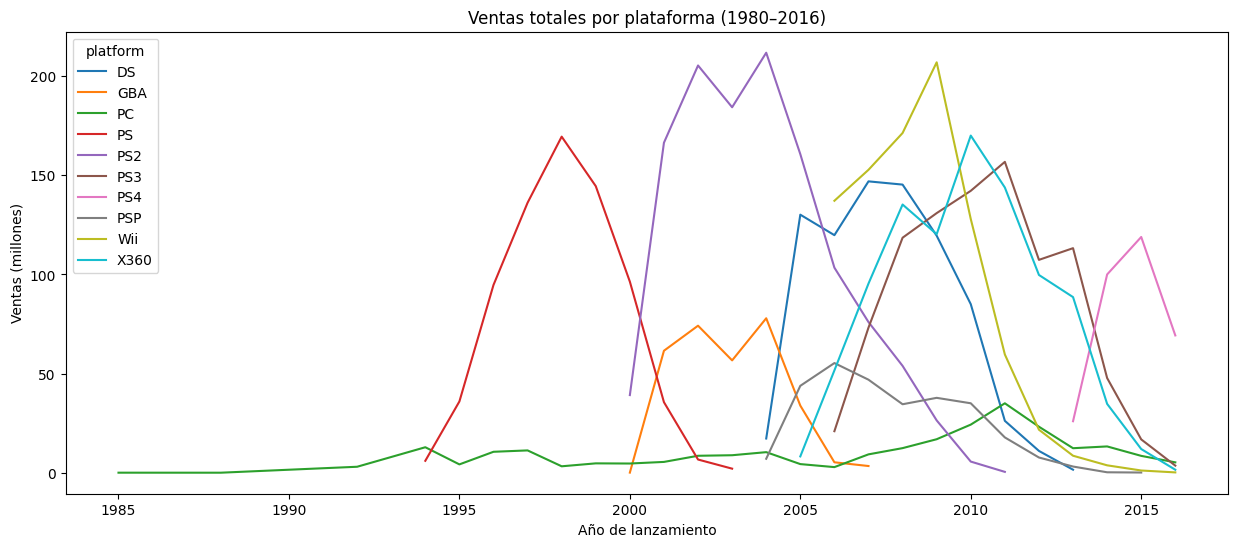

In [157]:
valid_years = dataset[(dataset['year_of_release'] >= 1980) & (dataset['year_of_release'] <= 2016)]
top_platforms = platform_sales.head(10).index

platform_year_sales = valid_years[valid_years['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_year_sales.plot(figsize=(15,6))
plt.title('Ventas totales por plataforma (1980–2016)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas (millones)')
plt.show()

In [158]:
#El periodo en que una plataforma aparece, sube sus ventas y vuelve a caer parece ser de al rededor 5 y 10 años, cuando una nueva plataforma aparece y empieza a
#alzar sus ventas, la antigua empieza a bajar hasta desaparecer, siendo aparentemente la excepcion PC, que aunque sus ventas no sobresalen es constante en el tiempo
#tambien es importante notar como la aparicion de un sucesor (PS-PS4) tambien reduce las ventas de su sucesor
#Es importante ver como la aparicion de competidores (GBA-PSP) (X360-PS4) tambien afecta las ventas

In [159]:
#Para construir un modelo de ventas del año 2017, seria razonable utilizar datos que abarquen los años 2006 hasta 2016, esto nos permitiria conocer la tendencia
#que una nueva consola (sucesor) podria tener en el mercado y como reaccionaria ante una competencia

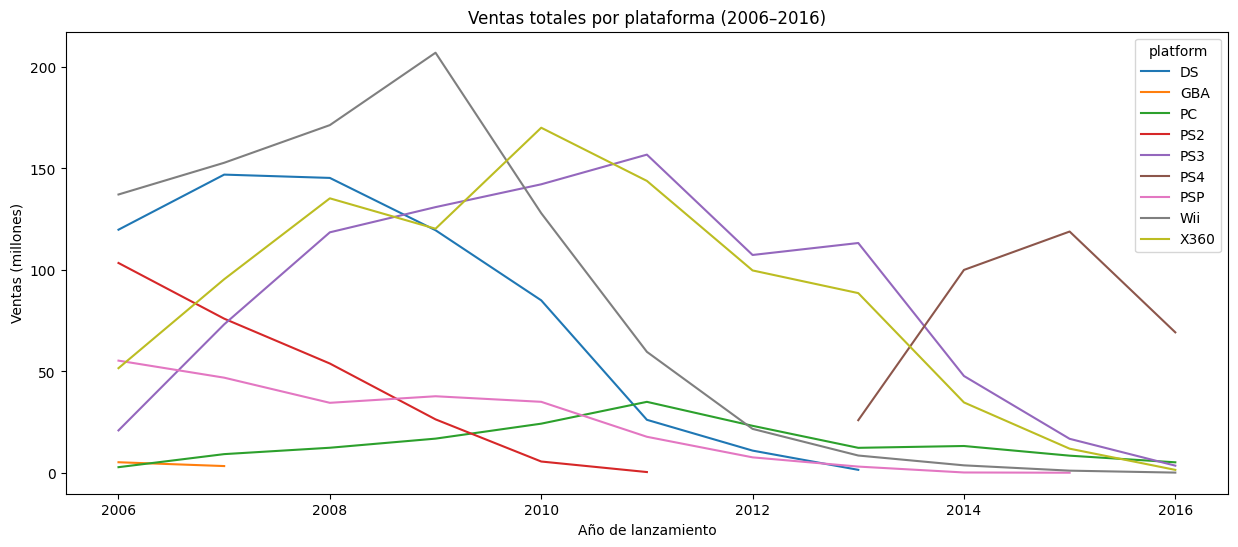

In [160]:
valid_years = dataset[(dataset['year_of_release'] >= 2006) & (dataset['year_of_release'] <= 2016)]
top_platforms = platform_sales.head(10).index

platform_year_sales = valid_years[valid_years['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
platform_year_sales.plot(figsize=(15,6))
plt.title('Ventas totales por plataforma (2006–2016)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas (millones)')
plt.show()

In [161]:
#Wii, DS, XBOX 360, PS3, PS2 se reducen
#PC no se reduce pero se mantiene estable en su propio rango de ventas
#PS4 es lider de ventas, siendo la de mayor crecimiento a finales del año

#Por lo tanto, las plataformas más rentables son PS4 y PC

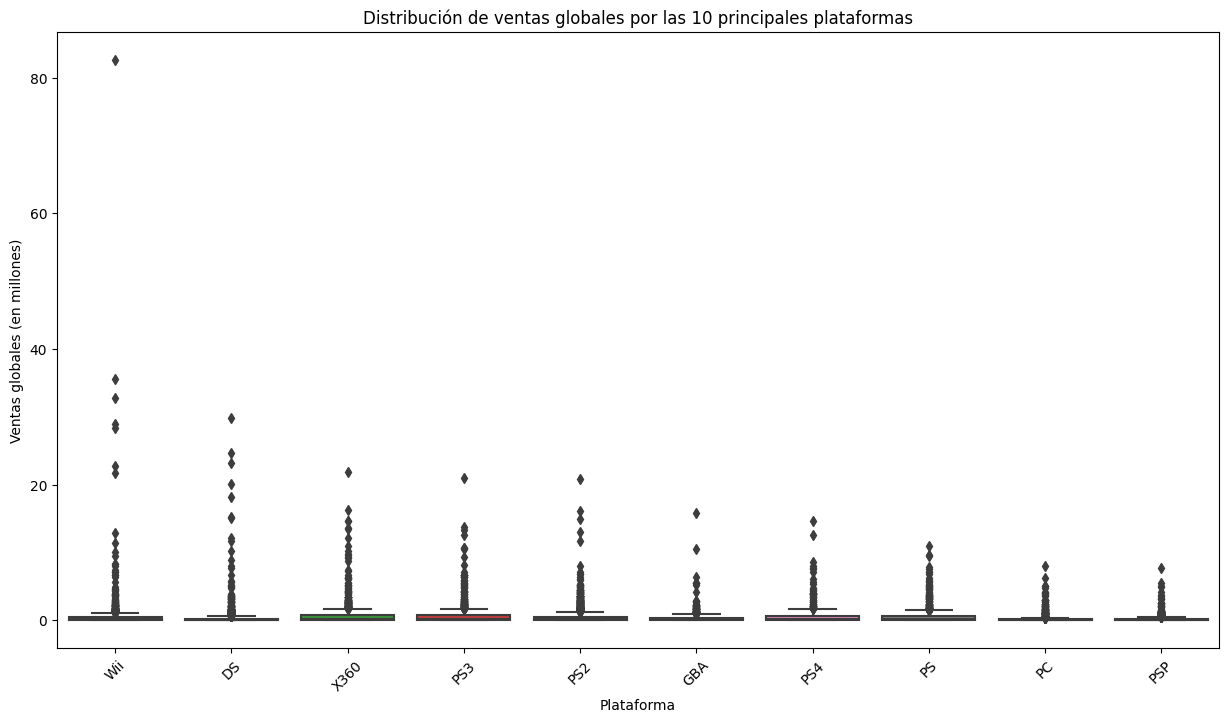

In [162]:
top_platforms = dataset.groupby('platform')['total_sales'].sum().nlargest(10).index
filtered_data = dataset[dataset['platform'].isin(top_platforms)]

plt.figure(figsize=(15,8))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por las 10 principales plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.xticks(rotation=45)
plt.show()

In [163]:
#La diferencia de ventas no es muy significativa, pero se puede ver una dispersion muy grande en casos como la wii y la ds, esto puede ser por culpa de juegos
#con sobreventa o juegos muy populares que crean valores atipicos, como resultado las ventas promedio puede verse arrastrada hacia arriba por esto mismo

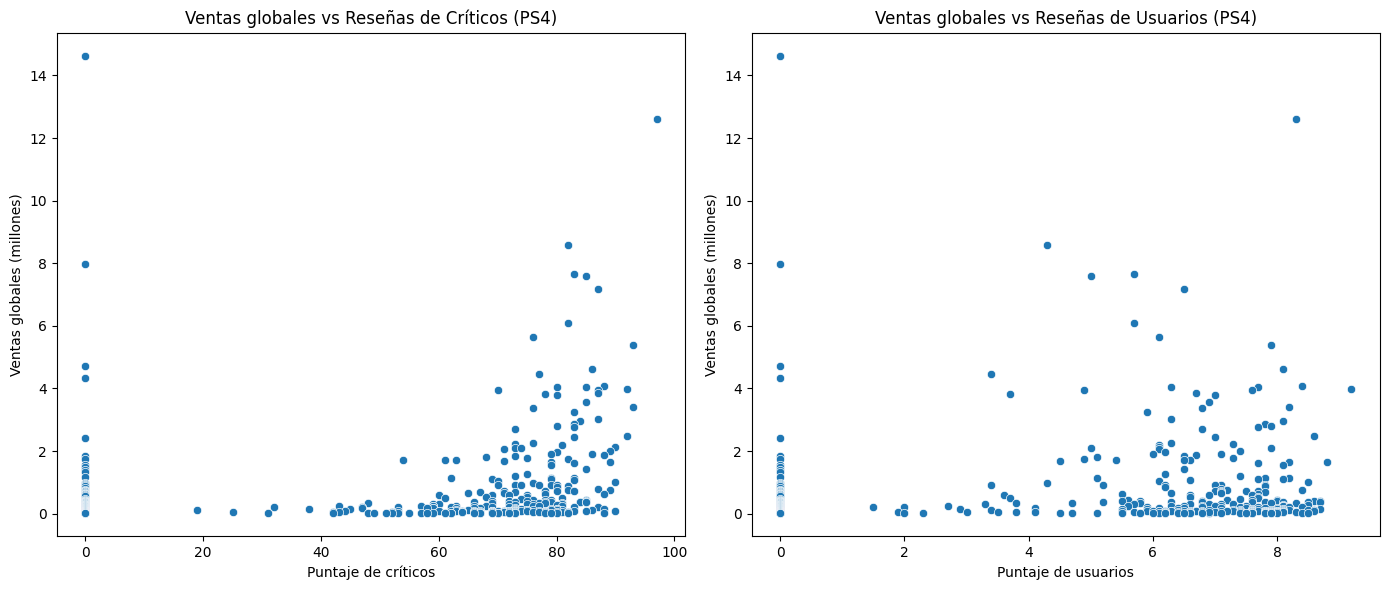

In [164]:
ps4_data = dataset[dataset['platform'] == 'PS4']

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Ventas globales vs Reseñas de Críticos (PS4)')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')

plt.subplot(1,2,2)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('Ventas globales vs Reseñas de Usuarios (PS4)')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas globales (millones)')

plt.tight_layout()
plt.show()

In [165]:
#Aqui se muestra muchas reseñas en el valor 0 que vamos a ignorar, pues estas representan la falta de datos

#En la primera grafica de dispersion, podemos ver una fuerte relacion entre el numero de ventas y la critica profecional, donde se nos muestra como una mejor
#critica se puede representar con un mayor numero de ventas

#Por otro lado, las reseñas de usuarios muestran una relacion más debil, sin una clara conexion entre ventas y reseñas, por lo tanto podriamos concluir que las reseñas
#de usuarios no son tan significativas a la hora de comprar un juego como si las son los de criticos

In [166]:
multi_platform = dataset['name'].value_counts()
multi_platform = multi_platform[multi_platform > 1].index

multi_platform_data = dataset[dataset['name'].isin(multi_platform)]
game_platform_sales = (
    multi_platform_data.groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

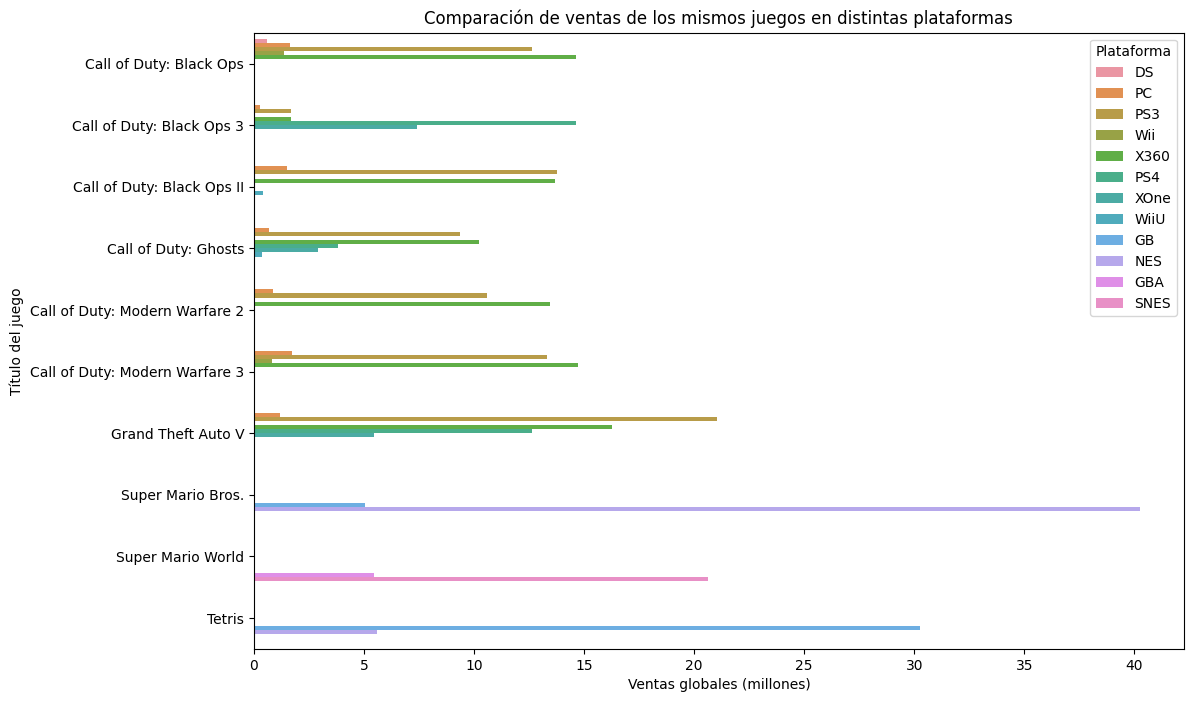

In [167]:
top_multi = (
    game_platform_sales.groupby('name')['total_sales']
    .sum()
    .nlargest(10)
    .index
)

top_multi_data = game_platform_sales[game_platform_sales['name'].isin(top_multi)]

plt.figure(figsize=(12,8))
sns.barplot(data=top_multi_data, x='total_sales', y='name', hue='platform')
plt.title('Comparación de ventas de los mismos juegos en distintas plataformas')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Título del juego')
plt.legend(title='Plataforma')
plt.show()

In [168]:
#Los juegos de nintendo suelen ser jugados más en las plataformas más recientes que tienen en el momento
#los juegos de accion como serian GTA y COD suelen ser jugados más en plataformas de PlayStation y Xbox

In [169]:
genre_sales = dataset.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
print(genre_sales)

           genre  total_sales
0         Action      1744.17
1         Sports      1331.27
2        Shooter      1052.45
3   Role-Playing       934.56
4       Platform       827.77
5           Misc       802.51
6         Racing       728.67
7       Fighting       447.53
8     Simulation       389.97
9         Puzzle       242.57
10     Adventure       237.59
11      Strategy       174.23


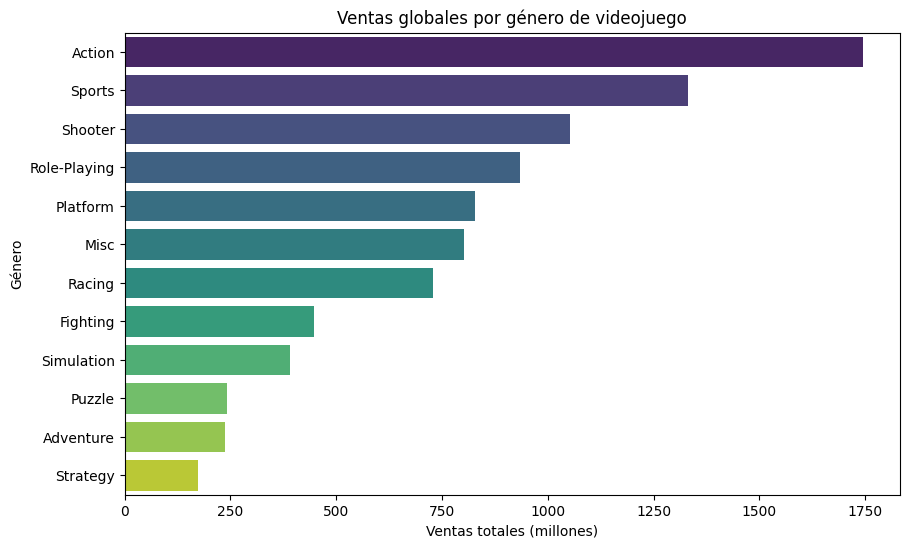

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_sales, x='total_sales', y='genre', palette='viridis')
plt.title('Ventas globales por género de videojuego')
plt.xlabel('Ventas totales (millones)')
plt.ylabel('Género')
plt.show()

In [171]:
#Los generos más rentables son Action, Sports y Shooter. Con esta base, podriamos generalizar que los juegos que representen más accion y movimiento tienden a tener
#ventas más altas que los juegos que son lentos y tranquilos, como son los de silumacion, puzzle, aventira y estrategia

In [172]:
##Paso 4. Crea un perfil de usuario para cada región

In [173]:
top5_na = dataset.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_eu = dataset.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_jp = dataset.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas en Norteamérica:")
print(top5_na)
print("\nTop 5 plataformas en Europa:")
print(top5_eu)
print("\nTop 5 plataformas en Japón:")
print(top5_jp)

Top 5 plataformas en Norteamérica:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [174]:
#En japon parece haber una preferencia por consolas de nintendo, algo normal considerando que es producto nacional, mostrando interes por consolas portatiles

#En Norteamerica hay una preferencia ligera de X360 sobre Playstation, un fenomeno que se puede explicar gracias a una mayor variedad de catalogo y facilidad
#para alterar las consolas, mostrando una preferencia por consolas domesticas

#En Europa existe una mayor preferencia para los productos de Playstation, algo que se puede explicar por una preferencia a la calidad de los juegos sobre la cantidad
#Lo que podria reflejar una preferencia por disfrutar de los graficos de los juegos, más en si es portatil o variado

In [175]:
top5_genre_na = dataset.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_genre_eu = dataset.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_genre_jp = dataset.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica:")
print(top5_genre_na)
print("\nTop 5 géneros en Europa:")
print(top5_genre_eu)
print("\nTop 5 géneros en Japón:")
print(top5_genre_jp)

Top 5 géneros en Norteamérica:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [176]:
#En europa y norteamerica, aun con la diferencia de consolas, se muestra un interes en similares estilos de juego, algo que se puede explicar con la distribucion
#No muy alejada de juegos de accion en linea como GTA y COD

#En japon por otro lado, se muestra una preferencia por juegos de rol, deportes, plataformas y accion, algo que encaja considerando la existencia de juegos como
#Pokemon y EarthBound en las consolas portatiles, encajando con esos titulos

In [177]:
rating_sales_na = dataset.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = dataset.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = dataset.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en NA:")
print(rating_sales_na)
print("\nVentas por clasificación ESRB en EU:")
print(rating_sales_eu)
print("\nVentas por clasificación ESRB en JP:")
print(rating_sales_jp)

Ventas por clasificación ESRB en NA:
rating
E       1292.99
RP      1240.68
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en EU:
rating
E       710.25
RP      613.38
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP:
rating
RP      841.93
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
Name: jp_sales, dtype: float64


In [178]:
#En norteamerica y europa prevalecen los juegos de clasificacion E, RP, T y M, Lo que indica un fuerte publico juvenil y adolescente, por lo tanto estas
#clasificaciones pueden ser importantes a la hora de tomar un juego

#Por otro lado, que en japon los juegos RP (Rate pending) prevalezcan nos indica que es posible que al publico japones la clasificacion de juegos sea mucho menos importante

In [180]:
#La hipotesis es "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."
#H0 = la media de user_score para Xbox One = la media de user_score para PC

#Naturalmente la hipotesis alternativa es que son diferentes
#h1 = user_score para Xbox One =/= la media de user_score para PC

In [181]:
xone_scores = dataset.loc[dataset['platform'] == 'XOne', 'user_score'].dropna()
pc_scores = dataset.loc[dataset['platform'] == 'PC', 'user_score'].dropna()

alpha = 0.5
results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No hay evidencia suficiente para rechazar H₀: las medias podrían ser iguales.")

p-value: 0.0005315801015576501
Rechazamos la hipótesis nula: las medias son diferentes.


In [182]:
#La hipotesis es "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes"
#H0 = la media de user_score para Acción =/= la media para Deportes

#Naturalmente la hipotesis alternativa es que son iguales
#h1 = la media de user_score para Acción = la media para Deportes

In [183]:
action_scores = dataset.loc[dataset['genre'] == 'Action', 'user_score'].dropna()
sports_scores = dataset.loc[dataset['genre'] == 'Sports', 'user_score'].dropna()

results2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print("No se rechaza H₀: las calificaciones difieren entre Acción y Deportes.")
else:
    print("Rechazamos H₀: las calificaciones podrían ser similares.")

p-value: 1.1599167086071376e-08
No se rechaza H₀: las calificaciones difieren entre Acción y Deportes.


In [184]:
##Conclusion

In [185]:
#La industria de los videojuegos tiene un comportamiento de renovacion constante, es necesario sacar nuevo hardware y software constantemente para mantenerse
#en el mercado, las opiniones de criticos parecen influir fuertemente en las ventas de los juegos mientras que las de usuarios pasan a segundo plano

#Por ultimo, más importante que la consola, el genero del juego es lo que determinara cuantos jugadores traera dependiendo de la region donde se lance